In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# 1 means you have diabetes
# 0 means you do not have diabetes

In [4]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']
feature_df = df[feature_cols]

X = feature_df.to_numpy()
y = df['Outcome'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred = log_reg.predict(X_test)

In [22]:
log_reg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
y_pred = log_reg.predict_proba(X_test)

In [35]:
X_test

array([[  1. ,   0. ,  42.9,  22. ],
       [  2. , 100. ,  33.6,  23. ],
       [  4. ,   0. ,  34. ,  25. ],
       [  5. , 175. ,  25.8,  51. ],
       [  0. ,   0. ,  24.6,  31. ],
       [  1. ,  40. ,  26.6,  24. ],
       [  9. , 171. ,  34.2,  33. ],
       [  3. , 156. ,  33.3,  52. ],
       [  2. , 275. ,  27.7,  25. ],
       [  6. , 190. ,  37.7,  55. ],
       [  3. , 245. ,  31.6,  28. ],
       [  5. , 207. ,  43.6,  53. ],
       [  5. ,   0. ,  24.9,  57. ],
       [  2. , 115. ,  28.5,  25. ],
       [  8. ,   0. ,  32. ,  42. ],
       [  0. ,   0. ,  27.3,  32. ],
       [  8. , 130. ,  32.7,  36. ],
       [  1. ,   0. ,  23. ,  21. ],
       [  4. ,   0. ,  28. ,  63. ],
       [  5. ,  83. ,  34. ,  30. ],
       [  4. ,   0. ,  38.5,  37. ],
       [  2. ,   0. ,  42.9,  21. ],
       [  2. ,   0. ,  28.9,  25. ],
       [  3. ,   0. ,  34.4,  46. ],
       [  1. , 140. ,  23.2,  22. ],
       [  1. ,   0. ,  35.8,  21. ],
       [  0. ,   0. ,  18.4,  27. ],
 

In [58]:
def get_feature_list(feature_matrix, col_index):
    feature_list = []
    for row in feature_matrix:
        feature_list.append(row[col_index])
    return np.array(feature_list)

In [75]:
f_list = get_feature_list(X_test, 2)

In [76]:
f_list.shape

(192,)

In [77]:
y_pos_pred = y_pred[:,1]

In [78]:
y_pos_pred.shape

(192,)

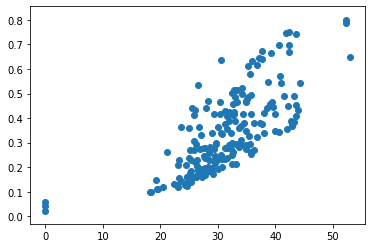

In [79]:
plt.scatter(f_list, y_pos_pred)

ValueError: x and y must be the same size

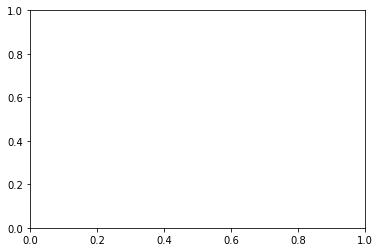

In [29]:
plt.scatter(X_test[1], y_pred)

In [9]:
pd.DataFrame(data=y_pred, columns=['Outcome'])['Outcome'].value_counts()

0    165
1     27
Name: Outcome, dtype: int64

In [10]:
pd.DataFrame(data=y_test, columns=['Outcome'])['Outcome'].value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [11]:
def get_outcome_err(l1, l2):
    assert(len(l1) == len(l2))
    errors = 0
    for i, j in zip(l1, l2):
        if(i != j):
            errors += 1
    return errors/len(l1)

In [12]:
get_outcome_err(y_pred, y_test)

0.3072916666666667

In [13]:
len(y_test) / len(y)

0.25

In [14]:
len(y_train) / len(y)

0.75

In [15]:
def generate_confusion_matrix(actual_list, predicted_list):
    out = [[0, 0],[0, 0]]
    # Predicted     0   1
    # Actual:    0 TN  FP
    # Actual:    1 FN  TP 

    assert(len(actual_list) == len(predicted_list))
    
    for actual,predicted in zip(actual_list, predicted_list):
        # True Negatives/positives
        if actual == predicted: # True {something}
            if actual == 0: # True Negatices
                out[0][0] += 1
            else: # True Positives
                out[1][1] += 1
        else: # False {something}
            if predicted == 1: # False Positives
                out[0][1] += 1
            else: # False negatives
                out[1][0] += 1
    
    return pd.DataFrame(data=out, columns=['0', '1'], index=['0', '1'])

In [16]:
c_matrix = generate_confusion_matrix(y_test, y_pred)
c_matrix

,0,1
0,118,12
1,47,15


In [17]:
(c_matrix.loc['0', '1'] + c_matrix.loc['1','0']) / len(y_test)

0.3072916666666667

In [18]:
c_matrix.sum().sum()

192

In [19]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[118  12]
 [ 47  15]]
